- Auto ARIMAX<br>
- Facebook Prophet<br>
- LightGBM<br>
- LSTM (coming soon)<br>

# 1. Getting the required packages 

Following three lines of code help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [16]:
# INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

`auto_arima` module from `pmdarima`, lightgbm and prophet packages have to be first installed using pip.

In [17]:
#installing packages
#uncomment below if packages are not already installed in your machine
#!pip install pmdarima
#!pip install lightgbm
#!pip install prophet --no-cache-dir

In [19]:
# importing PACKAGES:
import numpy as np
import pandas as pd


from pmdarima import auto_arima
import lightgbm as lgb
from prophet import Prophet

from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Getting the dataset

link to the data:[data](https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data?select=ICICIBANK.csv).<br>
There are datasets of stocks from 50 companies. We are using the bank ICICIBANK here. I have downloaded the dataset on my local directory manually. You can get it from the link above or from my github repo. 

In [22]:
!ls

ICICIBANK.csv  LICENSE	README.md  stock-market-prediction.ipynb


In [24]:
df = pd.read_csv("ICICIBANK.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,NaN,NaN,NaN
1,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,NaN,NaN,NaN
2,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,NaN,NaN,NaN
3,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,NaN,NaN,NaN
4,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,NaN,NaN,NaN


plotting the target variable VWAP over time

In [26]:
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,NaN,NaN,NaN
2000-01-04,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,NaN,NaN,NaN
2000-01-05,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,NaN,NaN,NaN
2000-01-06,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,NaN,NaN,NaN
2000-01-07,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,NaN,NaN,NaN


<AxesSubplot: xlabel='Date'>

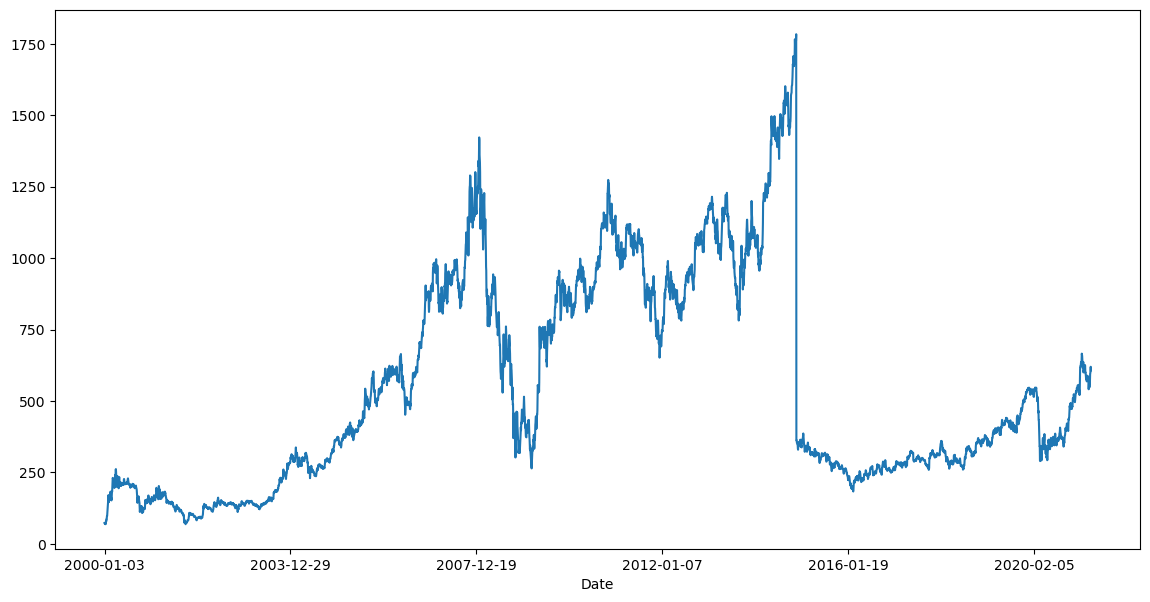

In [27]:
df.VWAP.plot(figsize=(14, 7))

# Feature Engineering

- Almost every time series problem have some external features or some internal feature engineering to help the model.

- Let's add some basic features like lag values of available numeric features that are widely used for time series problems. Since we need to predict the price of the stock for a day, we cannot use the feature values of the same day since they will be unavailable at actual inference time. We need to use statistics like mean, standard deviation of their lagged values.

- We will use three sets of lagged values, one previous day, one looking back 7 days and another looking back 30 days as a proxy for last week and last month metrics.

**References**:

1. [A modern Time Series tutorial](https://www.kaggle.com/code/rohanrao/a-modern-time-series-tutorial)